# 第 1 章： 了解计量的性质和经济数据

## 要点
1. 什么是计量经济学
2. 经验分析的步骤
3. 经济数据的结构
    - 横截面数据
    - 时间序列数据
    - 混合横截面数据
    - 面板数据
4. 因果&相关
5. Ceteris paribus：其他条件不变

## 课后数据操作题目练习

In [2]:
!pwd
!ls

/Users/mac/MyPrograme/Stata资料/econometric
401K.DTA             KIELMC.DTA           charity.dta
401ksubs.dta         LAWSCH85.DTA         chen11111.smcl
ADMNREV.DTA          LOWBRTH.DTA          chen_wooldridge.smcl
APPLE.DTA            MEAP93.DTA           consump.dta
ATHLET1.DTA          MLB1.DTA             cps91.dta
ATHLET2.DTA          MROZ.DTA             datachen.wf1
AUDIT.DTA            MURDER.DTA           discrim.dta
BARIUM.DTA           NYSE.DTA             elem94_95.dta
BWGHT.DTA            OPENNESS.DTA         engin.dta
CARD.DTA             PENSION.DTA          ezunem.dta
CEOSAL1.DTA          PNTSPRD.DTA          fitstat.do
CEOSAL2.DTA          PRISON.DTA           gaoyan.smcl
CORN.DTA             PRMINWGE.DTA         gpa2.dta
CPS78_85.DTA         RDCHEM.DTA           hprice1.dta
CRIME1.DTA           RENTAL.DTA           import_data.do
CRIME2.DTA           RETURN.DTA           infmrt.dta
CRIME3.DTA           SAVING.DTA           intdef.dta
CRIME4.DTA           SLEEP75.DTA 

In [4]:
import ipystata

IPyStata is loaded in batch mode.


In [5]:
%%stata -o wage_df      # 利用stata 魔法命令导入dta 格式数据，并传给DATAFRAME
use WAGE1,clear
sum



    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
        wage |        526    5.896103    3.693086        .53      24.98
        educ |        526    12.56274    2.769022          0         18
       exper |        526    17.01711    13.57216          1         51
      tenure |        526    5.104563    7.224462          0         44
    nonwhite |        526    .1026616    .3038053          0          1
-------------+---------------------------------------------------------
      female |        526    .4790875     .500038          0          1
     married |        526     .608365    .4885804          0          1
      numdep |        526    1.043726    1.261891          0          6
        smsa |        526    .7224335    .4482246          0          1
    northcen |        526    .2509506    .4339728          0          1
-------------+-------------------------------------------------

In [6]:
wage_df.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [11]:
%%stata 
hist educ


no variables defined
r(111);

end of do-file
r(111);


In [12]:
wage_df.describe()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [14]:
wage_df.wage.describe()

count    526.000000
mean       5.896103
std        3.693086
min        0.530000
25%        3.330000
50%        4.650000
75%        6.880000
max       24.980000
Name: wage, dtype: float64

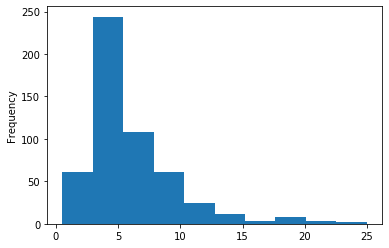

In [15]:
wage_df.wage.plot.hist()

In [21]:
bwght = pd.read_stata('BWGHT.DTA')
# meap01 = pd.read_stata('MEAP01.DTA')
jtran2 = pd.read_stata('JTRAIN2.DTA')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
%%stata -o meap01
use MEAP01

In [26]:
bwght.describe()

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
count,1388.000000,1388.000000,1388.000000,1388.000000,1192.000000,1387.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,29.026657,19.552954,130.559006,118.699568,13.186242,12.935833,1.632565,0.520893,0.784582,2.087176,4.760031,7.418723,0.104359,3.071271
std,18.739285,7.795598,10.244485,20.353964,2.745985,2.376728,0.894027,0.499743,0.411260,5.972688,0.190662,1.272123,0.298634,0.918065
min,0.500000,2.000000,103.800003,23.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,3.135494,1.437500,0.000000,-0.693147
25%,14.500000,15.000000,122.800003,107.000000,12.000000,12.000000,1.000000,0.000000,1.000000,0.000000,4.672829,6.687500,0.000000,2.674149
50%,27.500000,20.000000,130.800003,120.000000,12.000000,12.000000,1.000000,1.000000,1.000000,0.000000,4.787492,7.500000,0.000000,3.314186
75%,37.500000,26.000000,137.000000,132.000000,16.000000,14.000000,2.000000,1.000000,1.000000,0.000000,4.882802,8.250000,0.000000,3.624341
max,65.000000,38.000000,152.500000,271.000000,18.000000,18.000000,6.000000,1.000000,1.000000,50.000000,5.602119,16.937500,2.500000,4.174387


In [61]:
meap01.head()

,dcode,bcode,math4,read4,lunch,enroll,expend,exppp,lenroll,lexpend,lexppp
0,1010.0,4937,83.300003,77.800003,40.599998,468,2747475.0,5870.672852,6.148468,14.826193,8.677725
1,2070.0,597,90.300003,82.300003,27.100000,679,1505772.0,2217.631836,6.520621,14.224816,7.704195
2,2080.0,4860,61.900002,71.400002,41.750000,400,2121871.0,5304.677734,5.991465,14.567809,8.576344
3,3010.0,790,85.699997,60.000000,12.750000,251,1211034.0,4824.836426,5.525453,14.006985,8.481532
4,3010.0,1403,77.300003,59.099998,17.080000,439,1913501.0,4358.771973,6.084499,14.464445,8.379946


### math4 最值

In [60]:
display(meap01.math4.max())
meap01.math4.min()

100.0

0.0

In [28]:
jtran2.describe()

,train,age,educ,black,hisp,married,nodegree,mosinex,re74,re75,re78,unem74,unem75,unem78,lre74,lre75,lre78,agesq,mostrn
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,18.123596,2.102266,1.377139,5.300766,0.732584,0.649438,0.307865,0.419824,0.277108,1.135802,693.977528,7.687640
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5.311937,5.363584,3.150961,6.631493,0.443109,0.477683,0.462130,0.886254,0.796783,1.136259,429.781821,9.656205
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.809299,-2.599059,-3.106541,289.000000,0.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,21.000000,0.000000,0.000000,3.701810,1.000000,1.000000,0.000000,0.000000,0.000000,1.308822,576.000000,0.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,23.000000,0.824389,1.220840,8.124720,1.000000,1.000000,1.000000,0.000000,0.199539,2.094911,784.000000,15.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,24.000000,39.570702,25.142200,60.307899,1.000000,1.000000,1.000000,3.678089,3.224548,4.099463,3025.000000,24.000000


In [30]:
jtran2.head(100)

,train,age,educ,black,hisp,married,nodegree,mosinex,re74,re75,re78,unem74,unem75,unem78,lre74,lre75,lre78,agesq,mostrn
0,1,37,11,1,0,1,1,13,0.0,0.0,9.93005,1,1,0,0.0,0.0,2.295566,1369,13
1,1,22,9,0,1,0,1,13,0.0,0.0,3.59589,1,1,0,0.0,0.0,1.279792,484,13
2,1,30,12,1,0,0,0,13,0.0,0.0,24.90950,1,1,0,0.0,0.0,3.215249,900,13
3,1,27,11,1,0,0,1,13,0.0,0.0,7.50615,1,1,0,0.0,0.0,2.015723,729,13
4,1,33,8,1,0,0,1,13,0.0,0.0,0.28979,1,1,0,0.0,0.0,-1.238599,1089,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,25,12,0,0,0,0,23,0.0,0.0,5.58750,1,1,0,0.0,0.0,1.720532,625,23
96,1,18,9,1,0,0,1,21,0.0,0.0,4.48285,1,1,0,0.0,0.0,1.500259,324,21
97,1,42,12,1,0,0,0,22,0.0,0.0,2.45615,1,1,0,0.0,0.0,0.898595,1764,22
98,1,25,10,1,0,0,1,22,0.0,0.0,0.00000,1,1,1,0.0,0.0,0.000000,625,22


### 参加培训男性所占的比例：

In [48]:
jtran2.train.value_counts()[1]/(jtran2.train.value_counts()[0]+jtran2.train.value_counts()[1])

0.4157303370786517